### @GRIPAPRIL23 - The Spark Foundation
### Data Science & Business Analytics Intern


### Name : Shaik Naseer Hussain.


# <font color=BLUE><u>**TASK 2:** Prediction Using Unsupervised ML </u></font>


## <font color=green>**Problem statement:**</font><font color=tomato> From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually. </font>


**Step 1) Importing the Libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
#Importing the dataset

In [3]:
data = pd.read_csv('Task 2 Iris.csv')

In [4]:
 data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Step 2) Visualizing the data**

In [5]:
data.shape

(150, 6)

In [6]:
# To know about datatype and null values in columns in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# To get the columns names in the dataset.
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# To get the statistical measures in dataset, like. mean, median(50%), min, max, quatiles 25%,50%,75%...
data.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
# The unique values present in target feature
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris=pd.DataFrame(data)

In [11]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Preparation

In [12]:
#Dropping the columns ID and Species 
irisdf=iris.drop(columns=['Species','Id'])  

In [13]:
irisdf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Step 3) Checking for the outlier and removing them**

<Figure size 1200x1000 with 0 Axes>

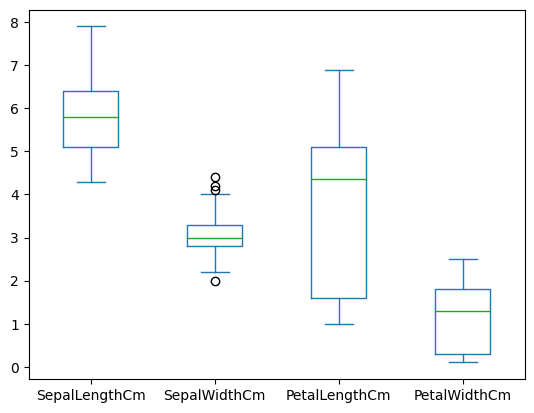

In [14]:
#checking for otliers by boxplot
plt.figure(figsize=[12,10])
irisdf.plot(kind="box")
plt.show()

Only SepalWidth has some outliers. We now remove the outliers as the clusters are very sensitive to outliers and tend to take the clusters towards them making inefficient clusters.

In [15]:
#Removingthe outliers using IQR method
Q1=irisdf.quantile(0.25)
Q3=irisdf.quantile(0.75)
IQR=Q3-Q1
irisdf=irisdf[~((irisdf<(Q1-1.5*IQR)) | (irisdf>(Q3+1.5*IQR))).any(axis=1)]

<Figure size 1200x1000 with 0 Axes>

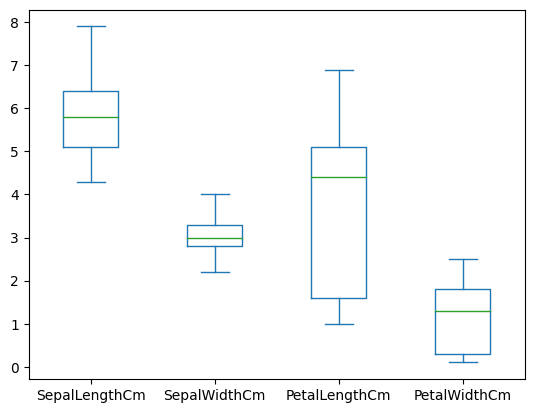

In [16]:
#Plotting the boxplot after revoing the outliers
plt.figure(figsize=[12,10])
irisdf.plot(kind="box")
plt.show()


Now we got rid of the outliers.

In [17]:
irisdf.shape  # lost 4 records

(146, 4)

## **Step 4) Using the Elbow method to find the optimum no. of clusters**  
- We use K-Means clustering algorithm of unsupervised ML to build the model. 
- But before building we need to give the number of clusters that the model should make inorder to have optimal number of clusters, while instantiating object from KMeans.
- Here we consider two two the Elbow method and the Silhoutee score method to decide on the optimum number of clusters(k) to perform the K-Means clustering.  


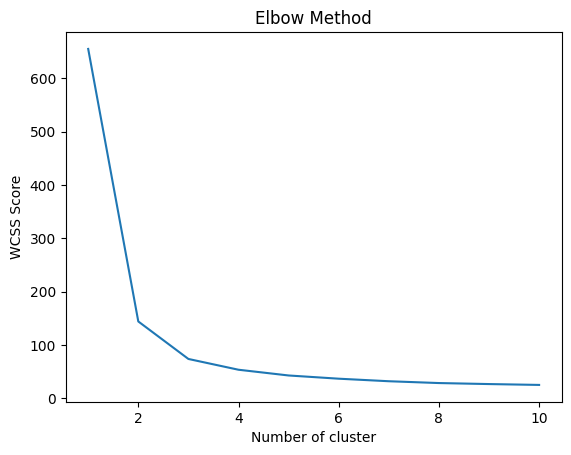

In [18]:
# Elbow Method.
x=irisdf.iloc[:,[0,1,2,3]].values  #Data Arrangement

from sklearn.cluster import KMeans  #create several cluster combination and observe the wcss(within cluster Sum of Squares)
wcss=[] #empty list to store wcss

for i in range(1,11): # Python range denoting number of clusters are optimum for our model.
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)  #fit the model on prepared data
    wcss.append(kmeans.inertia_) #returns wcss for specific value of k
    
# to plot graph
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS Score')
plt.show()

    

### Summary of above plot
- Elbow plot is plotted with the value of k(no of clusters on the x-axis and the WCSS(Within Clusters Sum of Squares) Score on the y-axis. The value of k corresponding to the Elbow point represents the optimal value for k.
- In Elbow Method the optimal clusters are found out by change(reduction) in WCSS Score while increasing K value, after some point the WCSS is not changed much, at that point we consider it as Optimal no of clusters for our model.
- In the above plot, the Elbow point is seen at 3 because after that there is not much change in WCSS score.
- Hence, the Elbow method shows that optimum value for k is 3.

## **Step 5) Optimum Value of K using Silhouette plot**

In [19]:
from sklearn.metrics import silhouette_score
# Silhouette Score
n_clus = [2, 3, 4, 5, 6, 7, 8]

for cluster in n_clus:
    kmeans = KMeans(n_clusters=cluster, max_iter=100)
    kmeans.fit(x)
    
    labels = kmeans.labels_
    # Silhouette Score
    silhouette  = silhouette_score(x, labels)
    print('For {0} clusters the silhouette score is : {1}'.format(kmeans.n_clusters, silhouette))

For 2 clusters the silhouette score is : 0.6867535359684322
For 3 clusters the silhouette score is : 0.5541488042389832
For 4 clusters the silhouette score is : 0.49722525796765404
For 5 clusters the silhouette score is : 0.49341621792167145
For 6 clusters the silhouette score is : 0.37141716448865125
For 7 clusters the silhouette score is : 0.36164504708815404
For 8 clusters the silhouette score is : 0.3409380079836069


Here we can consider 3 as optimal clusters because there is high reduction of silhouette score value from 2 clusters, you may 
consider 6 also a good one but it make our work complex.   
So we choose 3 as optimal K value.

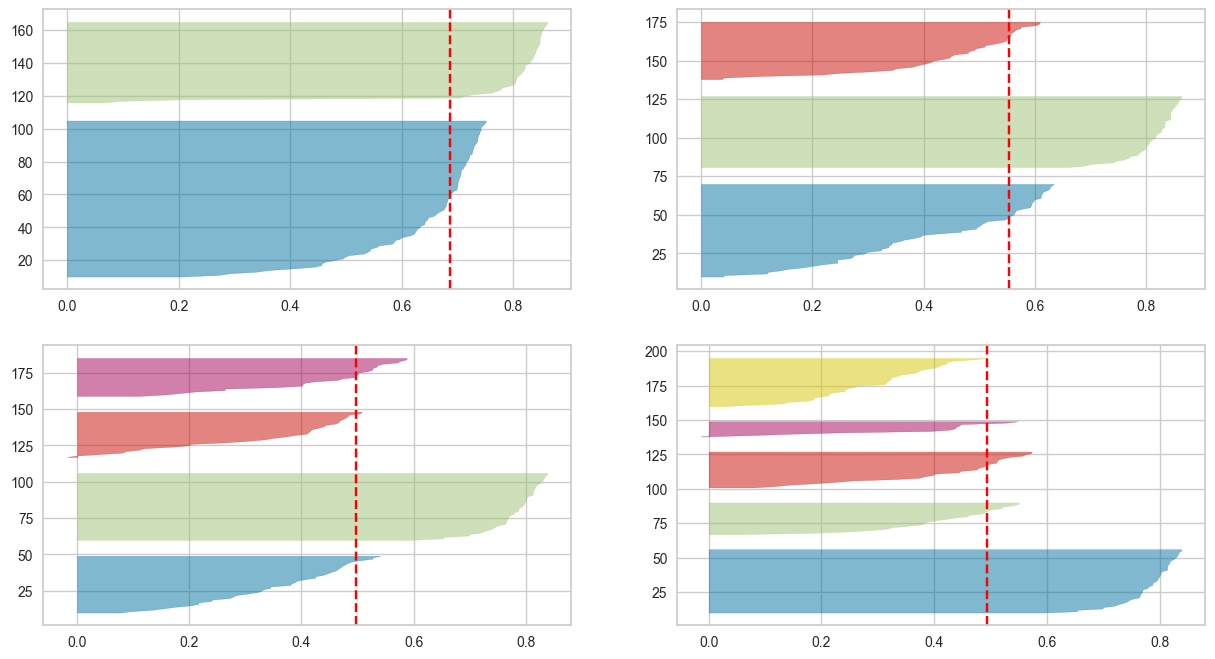

In [20]:
#plotting silhoutte visualiser
from yellowbrick.cluster import SilhouetteVisualizer

fig,ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    #Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km_labels=km.fit_predict(x)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

- The value of n_clusters as 4 and 5 looks to be suboptimal for the given data due to the following reasons:  
    - Presence of clusters with below-average silhouette scores 
    - Wide fluctuations in the size of the silhouette plots.   
    
    
- The value of 2 and 3 for n_clusters looks to be the optimal one. 
    - The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar.  


- The thickness of the silhouette plot representing each cluster also is a deciding point. 
    - For the plot with n_cluster 3 (top right), the thickness is more uniform than the plot with n_cluster as 2 (top left) with       one cluster thickness much more than the other. Thus, one can select the optimal number of clusters as 3.

### Building K-Means with 3 clusters.

In [21]:
# Creating the kmeans classifier with 3 clusters
kmeans=KMeans(n_clusters=3,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)   

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualizing KMeans.

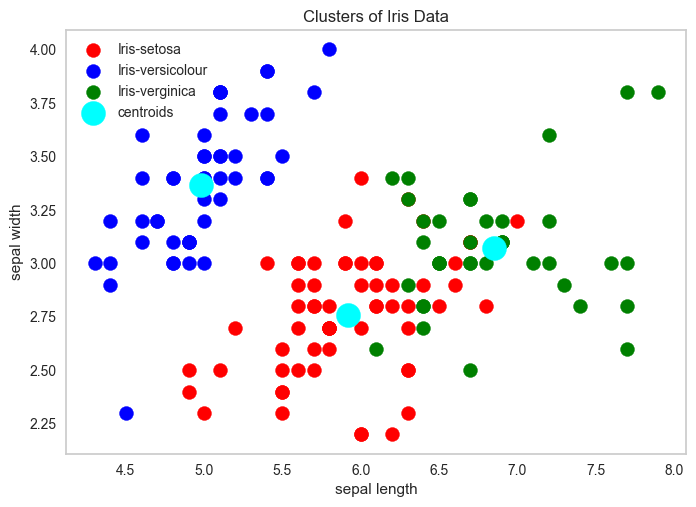

In [22]:
#Visualizing the clusters for the first two columns of the data
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-verginica')

 #plotting the centroid of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='aqua',label='centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.grid()

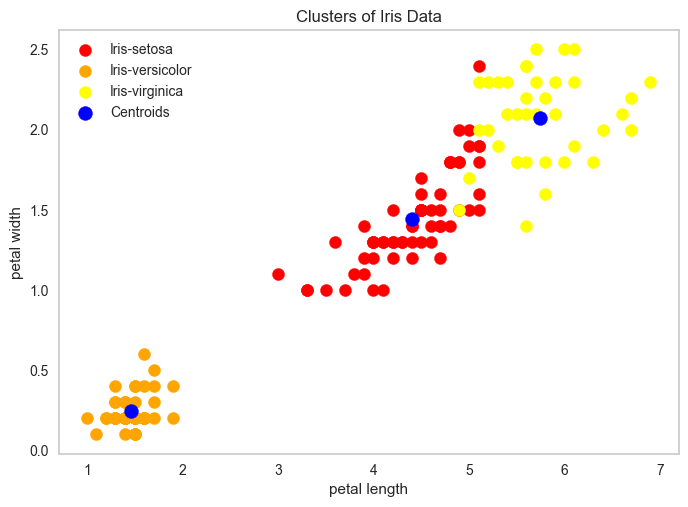

In [23]:
#Visualizing the clusters for the 3rd and 4th columns of the data
plt.scatter(x[ y_kmeans==0,2],x[ y_kmeans==0,3],s=75,c="red",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,2],x[ y_kmeans==1,3],s=75,c="orange",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,2],x[ y_kmeans==2,3],s=75,c="yellow",label="Iris-virginica")
#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,c="blue",label="Centroids")
plt.title('Clusters of Iris Data')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.grid()
plt.show()

Thus,we have predicted the optimum number of clusters and represented it visually.

# Thank You Future Data Scientists For Reading this   :)